# PRatioEncoder

The PRatioEncoder() replaces categories by the ratio of the probability of the
target = 1 and the probability of the target = 0.<br>

The target probability ratio is given by: p(1) / p(0).

The log of the target probability ratio is: np.log( p(1) / p(0) )
#### It only works for binary classification.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from feature_engine.encoding import PRatioEncoder

from feature_engine.encoding import RareLabelEncoder #to reduce cardinality

In [2]:
# Load titanic dataset from OpenML

def load_titanic():
    data = pd.read_csv('https://www.openml.org/data/get_csv/16826755/phpMYEkMl')
    data = data.replace('?', np.nan)
    data['cabin'] = data['cabin'].astype(str).str[0]
    data['pclass'] = data['pclass'].astype('O')
    data['age'] = data['age'].astype('float')
    data['fare'] = data['fare'].astype('float')
    data['embarked'].fillna('C', inplace=True)
    data.drop(labels=['boat', 'body', 'home.dest'], axis=1, inplace=True)
    return data

In [3]:
data = load_titanic()
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C,S


In [4]:
X = data.drop(['survived', 'name', 'ticket'], axis=1)
y = data.survived

In [5]:
# we will encode the below variables, they have no missing values
X[['cabin', 'pclass', 'embarked']].isnull().sum()

cabin       0
pclass      0
embarked    0
dtype: int64

In [6]:
''' Make sure that the variables are type (object).
if not, cast it as object , otherwise the transformer will either send an error (if we pass it as argument) 
or not pick it up (if we leave variables=None). '''

X[['cabin', 'pclass', 'embarked']].dtypes

cabin       object
pclass      object
embarked    object
dtype: object

In [7]:
# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((916, 8), (393, 8))

In [8]:
## Rare value encoder first to reduce the cardinality
# see RareLabelEncoder jupyter notebook for more details on this encoder
rare_encoder = RareLabelEncoder(tol=0.03,
                                n_categories=2, 
                                variables=['cabin', 'pclass', 'embarked'])

rare_encoder.fit(X_train)

# transform
train_t = rare_encoder.transform(X_train)
test_t = rare_encoder.transform(X_test)

The PRatioEncoder() replaces categories by the ratio of the probability of the
target = 1 and the probability of the target = 0.

The target probability ratio is given by: p(1) / p(0)

The log of the target probability ratio is: np.log( p(1) / p(0) )

Note: This categorical encoding is exclusive for binary classification.

For example in the variable colour, if the mean of the target = 1 for blue
is 0.8 and the mean of the target = 0  is 0.2, blue will be replaced by:
0.8 / 0.2 = 4 if ratio is selected, or log(0.8/0.2) = 1.386 if log_ratio
is selected.

Note: the division by 0 is not defined and the log(0) is not defined.
Thus, if p(0) = 0 for the ratio encoder, or either p(0) = 0 or p(1) = 0 for
log_ratio, in any of the variables, the encoder will return an error.

The encoder will encode only categorical variables (type 'object'). A list
of variables can be passed as an argument. If no variables are passed as
argument, the encoder will find and encode all categorical variables
(object type).

### Ratio

In [9]:
'''
Parameters
----------

encoding_method : str, default=woe
    Desired method of encoding.

    'ratio' : probability ratio

    'log_ratio' : log probability ratio

variables : list, default=None
    The list of categorical variables that will be encoded. If None, the
    encoder will find and select all object type variables.
'''
Ratio_enc = PRatioEncoder(encoding_method='ratio',
                           variables=['cabin', 'pclass', 'embarked'])

# to fit you need to pass the target y
Ratio_enc.fit(train_t, y_train)

PRatioEncoder(variables=['cabin', 'pclass', 'embarked'])

In [10]:
Ratio_enc.encoder_dict_

{'cabin': {'B': 3.1999999999999993,
  'C': 1.2903225806451615,
  'D': 2.5555555555555554,
  'E': 2.5555555555555554,
  'Rare': 1.3124999999999998,
  'n': 0.4385245901639344},
 'pclass': {1: 1.6136363636363635,
  2: 0.7735849056603774,
  3: 0.34959349593495936},
 'embarked': {'C': 1.2625000000000002,
  'Q': 0.5961538461538461,
  'S': 0.5127610208816704}}

In [11]:
# transform and visualise the data

train_t = Ratio_enc.transform(train_t)
test_t = Ratio_enc.transform(test_t)

test_t.sample(5)

,pclass,sex,age,sibsp,parch,fare,cabin,embarked
442,0.773585,male,24.0,2,0,73.5000,0.438525,0.512761
358,0.773585,female,42.0,0,0,13.0000,0.438525,0.512761
1130,0.349593,female,18.0,0,0,7.7750,0.438525,0.512761
113,1.613636,female,23.0,3,2,263.0000,1.290323,0.512761
108,1.613636,female,NaN,0,0,110.8833,0.438525,1.262500


### log ratio

In [14]:
train_t = rare_encoder.transform(X_train)
test_t = rare_encoder.transform(X_test)

logRatio_enc = PRatioEncoder(encoding_method='log_ratio',
                           variables=['cabin', 'pclass', 'embarked'])

# to fit you need to pass the target y
logRatio_enc.fit(train_t, y_train)

PRatioEncoder(encoding_method='log_ratio',
              variables=['cabin', 'pclass', 'embarked'])

In [15]:
logRatio_enc.encoder_dict_

{'cabin': {'B': 1.1631508098056806,
  'C': 0.2548922496287902,
  'D': 0.9382696385929302,
  'E': 0.9382696385929302,
  'Rare': 0.2719337154836416,
  'n': -0.8243393908312957},
 'pclass': {1: 0.4784902431230542,
  2: -0.25671984684781396,
  3: -1.0509842396788551},
 'embarked': {'C': 0.23309388216737797,
  'Q': -0.5172565140962812,
  'S': -0.6679453885859952}}

In [16]:
# transform and visualise the data

train_t = logRatio_enc.transform(train_t)
test_t = logRatio_enc.transform(test_t)

test_t.sample(5)

,pclass,sex,age,sibsp,parch,fare,cabin,embarked
649,-1.050984,male,23.0,0,0,7.0500,-0.824339,-0.667945
1217,-1.050984,male,19.0,0,0,7.6500,0.271934,-0.667945
271,0.478490,male,24.0,1,0,82.2667,1.163151,-0.667945
948,-1.050984,male,NaN,0,0,7.7500,-0.824339,-0.517257
934,-1.050984,female,4.0,0,2,22.0250,-0.824339,-0.667945


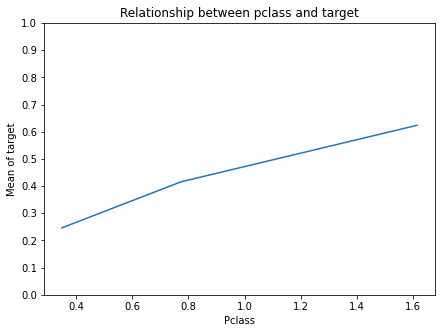

In [13]:
''' The PRatioEncoder(encoding_method='ratio' or 'log_ratio') has the characteristic that return monotonic
 variables, that is, encoded variables which values increase as the target increases'''

# let's explore the monotonic relationship
plt.figure(figsize=(7,5))
pd.concat([test_t,y_test], axis=1).groupby("pclass")["survived"].mean().plot()
#plt.xticks([0,1,2])
plt.yticks(np.arange(0,1.1,0.1))
plt.title("Relationship between pclass and target")
plt.xlabel("Pclass")
plt.ylabel("Mean of target")
plt.show()

### Automatically select the variables

This encoder will select all categorical variables to encode, when no variables are specified when calling the encoder.

In [17]:
train_t = rare_encoder.transform(X_train)
test_t = rare_encoder.transform(X_test)

logRatio_enc = PRatioEncoder(encoding_method='log_ratio')

# to fit you need to pass the target y
logRatio_enc.fit(train_t, y_train)

PRatioEncoder(encoding_method='log_ratio',
              variables=['pclass', 'sex', 'cabin', 'embarked'])

In [18]:
# transform and visualise the data

train_t = logRatio_enc.transform(train_t)
test_t = logRatio_enc.transform(test_t)

test_t.sample(5)

,pclass,sex,age,sibsp,parch,fare,cabin,embarked
1270,-1.050984,-1.465631,28.0,0,0,9.5000,-0.824339,-0.667945
1078,-1.050984,0.986309,NaN,0,0,7.8792,-0.824339,-0.517257
828,-1.050984,0.986309,10.0,5,2,46.9000,-0.824339,-0.667945
601,-1.050984,-1.465631,13.0,0,2,20.2500,-0.824339,-0.667945
936,-1.050984,0.986309,26.0,1,1,22.0250,-0.824339,-0.667945
